# Linear Algebra for Electrical Engineers


## HW10: Eigenvalues and Eigenvectors

---

- In this homework, you will be aksed to visualize the eigen analysis and conduct eigen decomposition.

- Since we don't study the numerical procedure for calculating the eigen values, we won't implement the function that 
computes the eigen values and eigen vectors by our hand. Instead, we will use `np.linalg.eig()` function.

- This homework mostly consists of the visualization implementation.

- This HW consists of 2 problems.
    - Problem 1. visualize the linear mapping and corresponding eigen values and vectors (0.5 point)
    - Problem 2. implement the spectral theorem (eigen decomposition). (0.5 point)

- please fill out all the 

        # Problem #K. fill out here.

    of given skeleton code.

In [1]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt
import itertools as it
from matplotlib.pyplot import figure
# install relevant python packages.
!pip install sympy
!pip install networkx
from sympy import *
from sympy.abc import x
import networkx as nx
from IPython.core.interactiveshell import InteractiveShell
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import random
from scipy.io import loadmat
import scipy.linalg as spl
import PIL
from PIL import Image

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
InteractiveShell.ast_node_interactivity = "all"
plt.rcParams[ "figure.figsize" ] = (10, 10)
# set the 2D and 3D origin of the plots.
origin2D = np.vstack([0, 0])
origin3D = np.vstack([0, 0, 0])
scale = 10

## Problem 1). Eigenvalues and Eigenvectors (0.5 point)
---

*$\lambda$ is an eigenvalue, and $x$ is an eigenvector of some matrix $A$, if $\lambda x = Ax$, meaning that $(A-\lambda I)x = 0$, and by definition an eigenvector is $\neq 0$, thus the null space of $A-\lambda I$ contains more than just 0, meaning it is not invertible and it's determinant is 0.*
*Provides general eigenvalue example for the identity matrix as it relates to properties of eigenvalues.*
### Computing Eigenvalues, Eigenvectors and Eigenspaces.

In [3]:
A = np.vstack([[4, 2], 
            [1, 3]])


Matrix(A)

Matrix([
[4, 2],
[1, 3]])

In [4]:
x = Symbol('lam')
# define a lambda function that creates an vector from eigenvalue in eigenspace.
Matrix(A - np.vstack([[x, 0],
                        [0, x]]))

Matrix([
[4 - lam,       2],
[      1, 3 - lam]])

The determinant of the above can be solved using ad-bc, which in the expanded and factorized version of the above case yields $(2-\lambda)(5-\lambda)$, meaning there are two eigenvalues: 2 and 5. To find the eigenvector spaces, we plug in each lambda into both eigenvalue positions and solve homogenous systems of equations.

Let's check the eigen values and corresponding eigen vectors.

In [5]:
eigval, eigvec = npl.eig(A)
# column of eigen vector (i.e. eigvec[:, i]) corresponds to the eigenvalue eigval[i].

eigvec_1 = eigvec[:, 0]
eigvec_2 = eigvec[:, 1]

print("Eigen values are: ", eigval)
print("Eigvec1: ", eigvec_1)
print("Eigvec2: ", eigvec_2)

Eigen values are:  [5. 2.]
Eigvec1:  [0.89442719 0.4472136 ]
Eigvec2:  [-0.70710678  0.70710678]


We can visualize above eigen vectors as spans of corresponding eigenspaces using the following.

(-7.5, 7.5, -7.5, 7.5)

Text(0.5, 1.0, "Black column vectors of A, and each red and blue is the span of it's eigenvectors.")

eigenvalue 1 5.0
The eigensapce of  5.0 is the span of the eigenvector: [0.89442719 0.4472136 ]
eigenvalue 2 2.0
The eigensapce of  2.0 is the span of the eigenvector: [-0.70710678  0.70710678]


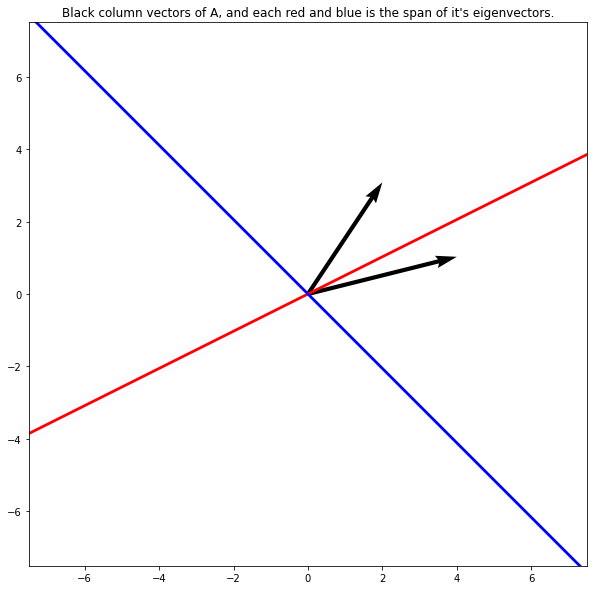

In [6]:
# Figure setup.
scale = 15
plt.axis([-scale/2, scale/2, -scale/2, scale/2])
plt.title("Black column vectors of A, and each red and blue is the span of it's eigenvectors.")

plt.quiver(*origin2D, *A[:, 0], scale=scale)
plt.quiver(*origin2D, *A[:, 1], scale=scale)
# Figure setup.

# # Eigenvalues in descending order.
lam1, lam2 = eigval
print("eigenvalue 1", lam1)
print("The eigensapce of ", lam1, "is the span of the eigenvector:", eigvec_1)

print("eigenvalue 2", lam2)
print("The eigensapce of ", lam2, "is the span of the eigenvector:", eigvec_2)

# plot the span of each eigenvector.
# for example, you can visualize the positive ray of the first eigenvector in a red color as  
plt.quiver(*origin2D, *eigvec_1 * 100, width = .005, scale=scale, color = "red") 

# now, let's plot the other direction
plt.quiver(*origin2D,  # Problem #1, fill in here.

# now, let's plot the other eigenvector in a blue color
plt.quiver(*origin2D, # Problem #1, fill in here.
plt.quiver(*origin2D,  # Problem #1, fill in here.

### Algebraic and geometric multiplicity.
*Shows the difference between algebraic and geometric multiplicity, in that a matrix may have two repeated eigenvalues that equal a number, but only one distinct unit eigenvector.*

In [7]:
A = np.vstack([
                [2, 1],
                [0, 2]
            ])
npl.eig(A)

(array([2., 2.]),
 array([[ 1.0000000e+00, -1.0000000e+00],
        [ 0.0000000e+00,  4.4408921e-16]]))

Numpy shows the eigenvalues are 2 and 2, while the eigenvectors are $[1,0],[-1,0]$.

### Now, let's check the eigenvalues and eigenvectors of some representative linear transformations.


#### Visualizing Eigenspaces.
*Overview of five linear mappings and their associated transformation matrices $A_i \in \mathbb{R}^{2\times 2}$ projecting 400 color-coded points $x \in \mathbb{R}^2$ (left column) onto target points $A_ix$ (right column). The central column depicts the first eigenvector, stretched by its associated eigenvalue $\lambda_1$, and the second eigenvector stretched by its eigenvalue $\lambda_2$. Each row depicts the effect of one of five transformation matrices $A_i$ with respect to the standard basis.*

In [8]:
# Initializing data.
scale = 7
# generate 400 data points x in R^2
data = np.linspace(-1, 1, 20)
# data in the original space R^2
original = np.vstack([[i, j] for i in data for j in data])
print("----- Shape of the data -----")
print(original.shape)

# gradually change the colors of each datapoint.
colors = np.vstack([[i, 0, j] for i in np.linspace(0, 1, 20) for j in np.linspace(1, 0, 20)])
# Initializing data.

----- Shape of the data -----
(400, 2)


In [9]:
# Applying transformation: stretching the space.
A1 = np.vstack([
                [1/2, 0],
                [0, 2]
               ])

# do eigen analysis
a1Eig = npl.eig(A1)

# apply transformation of the datapoints
originalA1 =  # Problem #1, fill in here.

# scalue the eigenvectors by corresponding eigenvalues.
a1 = # Problem #1, fill in here.

# Applying transformation from book.
print("----- Original data for 3 datapoints -----")
Matrix(original[:3]) # Original matrix.
print("----- Transformation matrix A -----")
Matrix(A1) # Transformation matrix.
print("----- Eigenvalues of A -----")
Matrix(a1Eig[0]) # Transformation eigenvalues.
print("----- Eigenvectors of A -----")
Matrix(a1Eig[1]) # Transformation eigenvectors.
print("----- Eigenvectors scaled by eigenvalues -----")
Matrix(a1) # Eigenvalue and vector plotting.
print("----- Transformed data for 3 datapoints -----")
Matrix(originalA1[:3]) # Transformed matrix.

----- Original data for 3 datapoints -----


Matrix([
[-1.0,               -1.0],
[-1.0, -0.894736842105263],
[-1.0, -0.789473684210526]])

----- Transformation matrix A -----


Matrix([
[0.5, 0.0],
[0.0, 2.0]])

----- Eigenvalues of A -----


Matrix([
[0.5],
[2.0]])

----- Eigenvectors of A -----


Matrix([
[1.0, 0.0],
[0.0, 1.0]])

----- Eigenvectors scaled by eigenvalues -----


Matrix([
[0.5, 0.0],
[0.0, 2.0]])

----- Transformed data for 3 datapoints -----


Matrix([
[-0.5,              -2.0],
[-0.5, -1.78947368421053],
[-0.5, -1.57894736842105]])

[-3.5, 3.5, -3.5, 3.5, -3.5, 3.5, -3.5, 3.5, -3.5, 3.5, -3.5, 3.5]

Text(0.5, 1.0, '$ \\lambda_{1,2}$ = 0.5, 2.0')

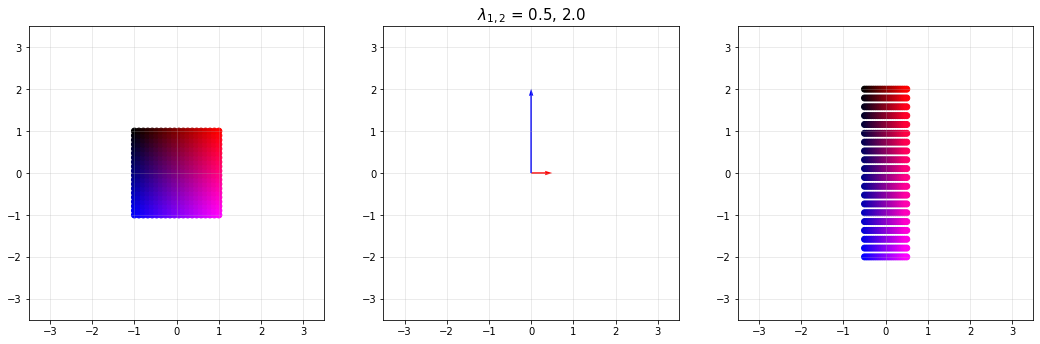

In [10]:
# Figure setup.
fig, a = plt.subplots(1, 3, figsize=(18, 5.4)) # a = [original vector space, eigen space, transformed space] 
a[0].grid(alpha= .3); a[1].grid(alpha= .3); a[2].grid(alpha= .3)
plt.setp(a, xlim=(-scale / 2, scale / 2), ylim=(-scale / 2, scale / 2))
a[0].scatter(original[:, 0], original[:, 1], color=colors)
# a[1].set_title(r"$ \lambda_{1,2}$ = %1.1f," %a1Eig[0][0] + " %1.1f" %a1Eig[0][1], size = 15)
a[1].set_title(r"$ \lambda_{1,2}$ = %1.1f," %a1Eig[0][0] + " %1.1f" %a1Eig[0][1], size = 15)
# Figure setup.

# Transformation. Plot the vectors

# plot the first eigenvector scaled by corresponding eigen value, in red. 
a[1].quiver(*origin2D, *a1[:, 0], scale=scale, width=.005, color = "r")

# plot the second eigenvector scaled by corresponding eigen value, in blue.
a[1].quiver(*origin2D,  # Problem #1, fill in here.

# Transformed data.
# visualize the transformed datapoints by A1.
a[2].scatter(originalA1[:, 0], originalA1[:, 1], color = colors)

The horizontal axis is compressed by a factor of $\frac{1}{2}$, the vertical axis is extended by a factor of 2.

In [11]:
# Applying transformation: shear the space.
A2 = np.vstack([
                [1, 1/2], 
                [0, 1]
               ])

originalA2 = # Problem #1, fill in here.

a2Eig = npl.eig(A2)

a2 =  # Problem #1, fill in here.
# Applying transformation from book.

print("----- Original data for 3 datapoints -----")
Matrix(original[:3]) # Original matrix.
print("----- Transformation matrix A -----")
Matrix(A2) # Transformation matrix.
print("----- Eigenvalues of A -----")
Matrix(a2Eig[0]) # Transformation eigenvalues.
print("----- Eigenvectors of A -----")
Matrix(a2Eig[1]) # Transformation eigenvectors.
print("----- Eigenvectors scaled by eigenvalues -----")
Matrix(a2) # Eigenvalue and vector plotting.
print("----- Transformed data for 3 datapoints -----")
Matrix(originalA2[:3]) # Transformed matrix.

----- Original data for 3 datapoints -----


Matrix([
[-1.0,               -1.0],
[-1.0, -0.894736842105263],
[-1.0, -0.789473684210526]])

----- Transformation matrix A -----


Matrix([
[1.0, 0.5],
[0.0, 1.0]])

----- Eigenvalues of A -----


Matrix([
[1.0],
[1.0]])

----- Eigenvectors of A -----


Matrix([
[1.0,                 -1.0],
[0.0, 4.44089209850063e-16]])

----- Eigenvectors scaled by eigenvalues -----


Matrix([
[1.0,                 -1.0],
[0.0, 4.44089209850063e-16]])

----- Transformed data for 3 datapoints -----


Matrix([
[             -1.5,               -1.0],
[-1.44736842105263, -0.894736842105263],
[-1.39473684210526, -0.789473684210526]])

[-3.5, 3.5, -3.5, 3.5, -3.5, 3.5, -3.5, 3.5, -3.5, 3.5, -3.5, 3.5]

Text(0.5, 1.0, '$ \\lambda_{1, 2}$ = 1.0, 1.0')

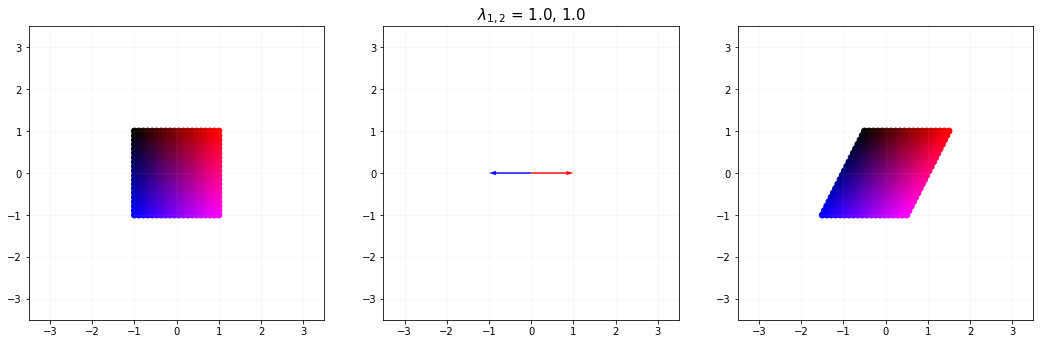

In [12]:
# Figure setup.
fig, a = plt.subplots(1, 3, figsize=(18, 5.4))
a[0].grid(alpha=.1); a[1].grid(alpha=.1); a[2].grid(alpha=.1);
plt.setp(a, xlim=(-scale/2, scale/2), ylim=(-scale/2, scale/2))
a[0].scatter(original[:, 0], original[:, 1], color=colors)
a[1].set_title(r"$ \lambda_{1, 2}$ = %1.1f," %a2Eig[0][0] + " %1.1f" %a2Eig[0][1], size = 15)
# Figure setup.

# Transformation. plot the vectors

# plot the first eigenvector scaled by corresponding eigen value, in red. 
a[1].quiver(*origin2D, *a2[:, 0], scale=scale, width=.005, color = "r")

# plot the second eigenvector scaled by corresponding eigen value, in blue.
a[1].quiver(*origin2D,  # Problem #1, fill in here.

# Transformed data.
# visualize the transformed datapoints by A2.
a[2].scatter(originalA2[:, 0], originalA2[:, 1], color = colors)


Shearing along the horizontal axis, and the eigenvectors are collinear indicating the mapping acts only along one direction. 

In [13]:
# Applying transformation: rotate the space.
A3 = (1/2) * np.vstack([
                        [np.sqrt(3), -1],
                        [1, np.sqrt(3)]
                       ])

originalA3 =  # Problem #1, fill in here.

a3Eig = npl.eig(A3)
a3 = # Problem #1, fill in here.

# Applying transformation from book.

print("----- Original data for 3 datapoints -----")
Matrix(original[:3]) # Original matrix.
print("----- Transformation matrix A -----")
Matrix(A3) # Transformation matrix.
print("----- Eigenvalues of A -----")
Matrix(a3Eig[0]) # Transformation eigenvalues.
print("----- Eigenvectors of A -----")
Matrix(a3Eig[1]) # Transformation eigenvector.
print("----- Eigenvectors scaled by eigenvalues -----")
Matrix(a3) # Eigenvalue and vector for plotting.
print("----- Transformed data for 3 datapoints -----")
Matrix(originalA3[:3]) # Transformed matrix.

----- Original data for 3 datapoints -----


Matrix([
[-1.0,               -1.0],
[-1.0, -0.894736842105263],
[-1.0, -0.789473684210526]])

----- Transformation matrix A -----


Matrix([
[0.866025403784439,              -0.5],
[              0.5, 0.866025403784439]])

----- Eigenvalues of A -----


Matrix([
[0.866025403784439 + 0.5*I],
[0.866025403784439 - 0.5*I]])

----- Eigenvectors of A -----


Matrix([
[-0.707106781186547*I, 0.707106781186547*I],
[  -0.707106781186548,  -0.707106781186548]])

----- Eigenvectors scaled by eigenvalues -----


Matrix([
[ 0.353553390593274 - 0.612372435695794*I,  0.353553390593274 + 0.612372435695794*I],
[-0.612372435695795 - 0.353553390593274*I, -0.612372435695795 + 0.353553390593274*I]])

----- Transformed data for 3 datapoints -----


Matrix([
[-0.366025403784439, -1.36602540378444],
[-0.418656982731807, -1.27486483496502],
[-0.471288561679175, -1.18370426614561]])

[-3.5, 3.5, -3.5, 3.5, -3.5, 3.5, -3.5, 3.5, -3.5, 3.5, -3.5, 3.5]

Text(0.5, 1.0, '$ \\lambda_{1,2}$ = 0.9, 0.9')

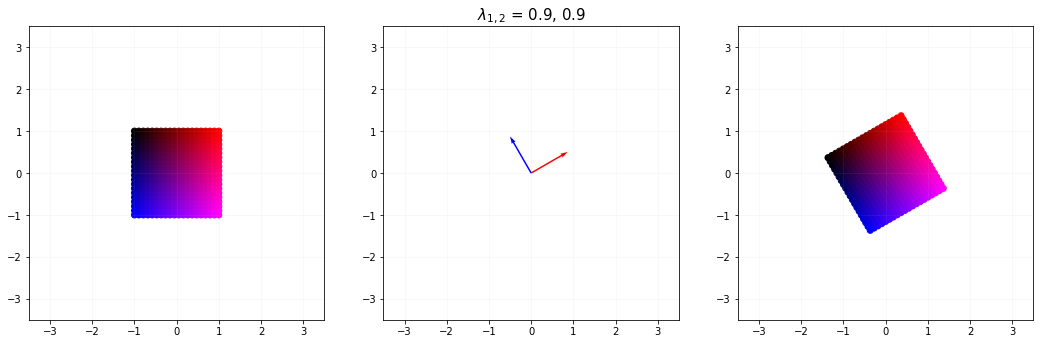

In [14]:
# Applying transformation: collapsing the space to a line.
fig, a = plt.subplots(1, 3, figsize=(18, 5.4))
a[0].grid(alpha=.1); a[1].grid(alpha=.1); a[2].grid(alpha=.1);
plt.setp(a, xlim=(-scale/2, scale/2), ylim=(-scale/2, scale/2))
a[0].scatter(original[:,0], original[:,1], color=colors)
a[1].set_title(r"$ \lambda_{1,2}$ = %1.1f," %a3Eig[0][0] + " %1.1f" %a3Eig[0][1], size = 15)
# Figure setup.

# Transformation.
a[1].quiver(*origin2D, *A3[:, 0], scale=scale, width=.005, color = "r")

a[1].quiver(*origin2D,  # Problem #1, fill in here.


# Transformed data.
a[2].scatter(originalA3[:, 0], originalA3[:, 1], color = colors)

Rotation by $\frac{\pi}{6}$. There are no eigenvectors to draw as this is a rotation, however the rotated matrix is drawn above.


In [15]:
# Collpapse a space into a line.
A4 = np.vstack([
                [1, -1],
                [-1, 1]
               ])
originalA4 = # Problem #1, fill in here.
a4Eig = npl.eig(A4)
a4 =  # Problem #1, fill in here.
# Applying transformation from book.

print("----- Original data for 3 datapoints -----")
Matrix(original[:3]) # Original matrix.
print("----- Transformation matrix A -----")
Matrix(A4) # Transformation matrix.
print("----- Eigenvalues of A -----")
Matrix(a4Eig[0]) # Transformation eigenvalues.
print("----- Eigenvectors of A -----")
Matrix(a4Eig[1]) # Transformation eigenvector.
print("----- Eigenvectors scaled by eigenvalues -----")
Matrix(a4) # Eigenvalue and vector for plotting.
print("----- Transformed data for 3 datapoints -----")
Matrix(originalA4[:3]) # Transformed matrix.

----- Original data for 3 datapoints -----


Matrix([
[-1.0,               -1.0],
[-1.0, -0.894736842105263],
[-1.0, -0.789473684210526]])

----- Transformation matrix A -----


Matrix([
[ 1, -1],
[-1,  1]])

----- Eigenvalues of A -----


Matrix([
[2.0],
[0.0]])

----- Eigenvectors of A -----


Matrix([
[ 0.707106781186547, 0.707106781186547],
[-0.707106781186547, 0.707106781186547]])

----- Eigenvectors scaled by eigenvalues -----


Matrix([
[ 1.41421356237309, 0.0],
[-1.41421356237309, 0.0]])

----- Transformed data for 3 datapoints -----


Matrix([
[               0.0,               0.0],
[-0.105263157894737, 0.105263157894737],
[-0.210526315789474, 0.210526315789474]])

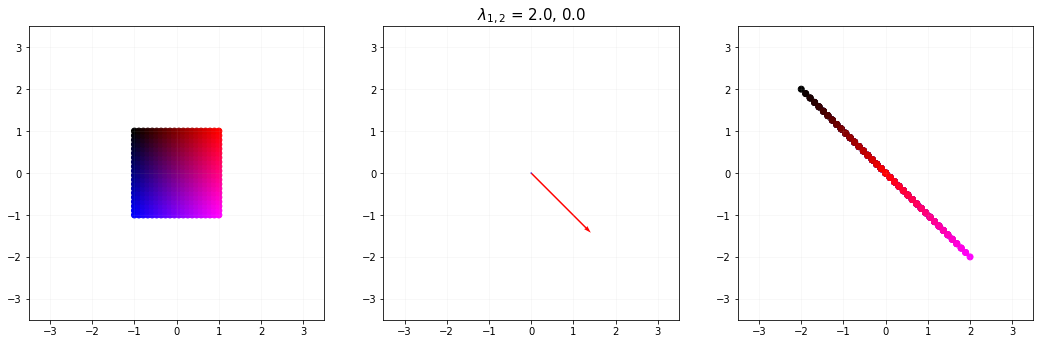

In [16]:
# Figure setup.
fig,a = plt.subplots(1, 3, figsize=(18, 5.4))
a[0].grid(alpha=.1); a[1].grid(alpha=.1); a[2].grid(alpha=.1);
plt.setp(a, xlim=(-scale/2, scale/2), ylim=(-scale/2, scale/2))
a[0].scatter(original[:, 0], original[:, 1], color=colors)
a[1].set_title(r"$ \lambda_{1,2}$ = %1.1f," %a4Eig[0][0] + " %1.1f" %a4Eig[0][1], size = 15)
# Figure setup.

# Transformation.
a[1].quiver(*origin2D, *a4[:,0], scale=scale, width=.005, color = "r")
a[1].quiver(*origin2D,  # Problem #1, fill in here.

# Transformed data.
a[2].scatter(originalA4[:,0], originalA4[:,1], color = colors)


One eigenvector is collapsed to 0, while the other is stretched to 2. 

In [20]:
# Applying transformation from book.
A5 = np.vstack([
                [1, 1/2],
                [1/2, 1]
                ])
originalA5 =  # Problem #1, fill in here.

a5Eig = npl.eig(A5)
a5 =  # Problem #1, fill in here.

# Applying transformation from book.

print("----- Original data for 3 datapoints -----")
Matrix(original[:3]) # Original matrix.
print("----- Transformation matrix A -----")
Matrix(A5) # Transformation matrix.
print("----- Eigenvalues of A -----")
Matrix(a5Eig[0]) # Transformation eigenvalues.
print("----- Eigenvectors of A -----")
Matrix(a5Eig[1]) # Transformation eigenvector.
print("----- Eigenvectors scaled by eigenvalues -----")
Matrix(a5) # Eigenvalue and vector for plotting.
print("----- Transformed data for 3 datapoints -----")
Matrix(originalA5[:3]) # Transformed matrix.

----- Original data for 3 datapoints -----


Matrix([
[-1.0,               -1.0],
[-1.0, -0.894736842105263],
[-1.0, -0.789473684210526]])

----- Transformation matrix A -----


Matrix([
[1.0, 0.5],
[0.5, 1.0]])

----- Eigenvalues of A -----


Matrix([
[1.5],
[0.5]])

----- Eigenvectors of A -----


Matrix([
[0.707106781186548, -0.707106781186547],
[0.707106781186547,  0.707106781186548]])

----- Eigenvectors scaled by eigenvalues -----


Matrix([
[1.06066017177982, -0.353553390593274],
[1.06066017177982,  0.353553390593274]])

----- Transformed data for 3 datapoints -----


Matrix([
[             -1.5,              -1.5],
[-1.44736842105263, -1.39473684210526],
[-1.39473684210526, -1.28947368421053]])

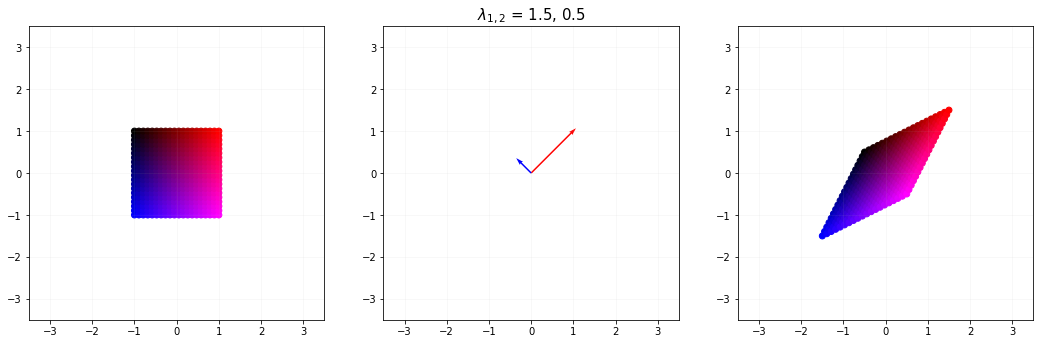

In [21]:
# Figure setup.
fig, a = plt.subplots(1, 3, figsize=(18, 5.4))
a[0].grid(alpha=.1); a[1].grid(alpha=.1); a[2].grid(alpha=.1);
plt.setp(a, xlim=(-scale/2, scale/2), ylim=(-scale/2, scale/2))
a[0].scatter(original[:,0], original[:,1], color=colors)
a[1].set_title(r"$ \lambda_{1,2}$ = %1.1f," %a5Eig[0][0] + " %1.1f" %a5Eig[0][1], size = 15)
# Figure setup.

# Transformation.
a[1].quiver(*origin2D, *a5[:, 0], scale=scale, width=.005, color = "r")
a[1].quiver(*origin2D,  # Problem #1, fill in here.

a[2].scatter(originalA5[:, 0], originalA5[:, 1], color = colors)
# Transformation.

Shear and stretch that shrinks by .75, stretching by 1.5 and compressing in the orthogonal by .5.

## Problem 2). Spectral Theorem (Eigendecomposition) (0.5 point)
___

1. A symmetric matrix is a square matrix that is equal to it's transpose.
1. A diagonal matrix is a matrix with zeroes in all off diagonal positions.
1. A matrix '$A$' can be decomposed into $X$ and $D$, $D$ is a diagonal matrix that is $= X^{-1}AX$; and $X$ is invertible.
1. 'A' is a linear mapping. We are looking for another way of expressing the same linear mapping, but in another basis. 
1. If there exists an invertible matrix $X$, s.t. $D=X^{-1}AX$, we can say that '$A$' is 'diagonalizable. 
1. If a matrix is symmetric, we can say $D = XAX^{-1}$.
1. $X$ is an orthogonal matrix of eigenvectors $\mathbf{x}_1, \cdots, \mathbf{x}_n$.
1. The diagonal entries of $D$ are $\lambda_1, \cdots, \lambda_n$.

In [22]:
# Rotation mappings for creating a circle and rotation of basis.
# lambda ftn for deg -> theta
theta = lambda deg: deg * (np.pi/180)
# rotation mapping to draw circles
fn = lambda theta: np.array([
                            [np.cos(theta), -np.sin(theta)],
                            [np.sin(theta), np.cos(theta)]
                            ])
# Rotation mappings for creating a circle and rotation of basis.

ang = 30
basis = np.vstack([
                  [1, 0],
                  [0, 1]
                  ])
tempScale = np.vstack([
                      [2, 0],
                      [0, .5]
                      ])

# Decomposition.
A = fn(theta(ang)) @ tempScale
print("----- Our matrix A -----")
Matrix(A)
print("----- Is A diagonalizable? -----")
Matrix(A).is_diagonalizable() # See Matrix(np.vstack([[3,1],[0,3]])).is_diagonalizable() to see a 'False' result.

# X is a orthogonal matrix of eigenvectors
X =  # Problem #2, fill in here.

# elementwise multiplication of eigen values and eigonal matrix
# hint: you may consider numpy's broadcasting (2, 2) * (2, 1) -> ??
D =  # Problem #2, fill in here.

Xinv = npl.inv(X)

print("----- Eigenvectors as columns -----")
Matrix(X)
print("----- Eigenvalues as diagonal entries -----")
Matrix(D)
print("----- Inverse of X -----")
Matrix(Xinv)
# Decomposition.

# Identities.
print("----- Is A equals to X D X^-1 ? -----")
print(np.allclose(A, X @ D @ Xinv))
Matrix(X @ D @ Xinv) # A = X D X^-1


print("----- Is D equals to X^-1 A X ? -----")
print(np.allclose(D, Xinv @ A @ X))
Matrix(Xinv @ A @ X) # D = X^-1 A X

----- Our matrix A -----


Matrix([
[1.73205080756888,             -0.25],
[             1.0, 0.433012701892219]])

----- Is A diagonalizable? -----


True

----- Eigenvectors as columns -----


Matrix([
[0.728713553878169, 0.228713553878169],
[0.684818630291443, 0.973493764886256]])

----- Eigenvalues as diagonal entries -----


Matrix([
[1.49710985352497,               0.0],
[             0.0, 0.667953655936123]])

----- Inverse of X -----


Matrix([
[ 1.76111648393355, -0.413758386917793],
[-1.23888351606645,   1.31829242065108]])

----- Is A equals to X D X^-1 ? -----
True


Matrix([
[1.73205080756888,             -0.25],
[             1.0, 0.433012701892219]])

----- Is D equals to X^-1 A X ? -----
True


Matrix([
[    1.49710985352497,               0.0],
[2.22044604925031e-16, 0.667953655936123]])

### Geometric interpretation of spectral theorem (eigendecomposition)

[-2.5,
 2.5,
 -2.5,
 2.5,
 -2.5,
 2.5,
 -2.5,
 2.5,
 -2.5,
 2.5,
 -2.5,
 2.5,
 -2.5,
 2.5,
 -2.5,
 2.5]

Text(0.5, 1.0, '(a) Eigenvectors $\\mathbf{x}_1$ (red) and $\\mathbf{x}_2$ (pink) in the standard basis')

Text(0.5, 1.0, '(b) $X^{-1}$ performs a basis change; maps eigenvectors to standard basis')

Text(0.5, 1.0, '(c) $D$ performs scaling along the the mapped orthgonal eigenvectors')

Text(0.5, 1.0, '(d) Reverse mapping $X$ from eigenvectors to standard basis')

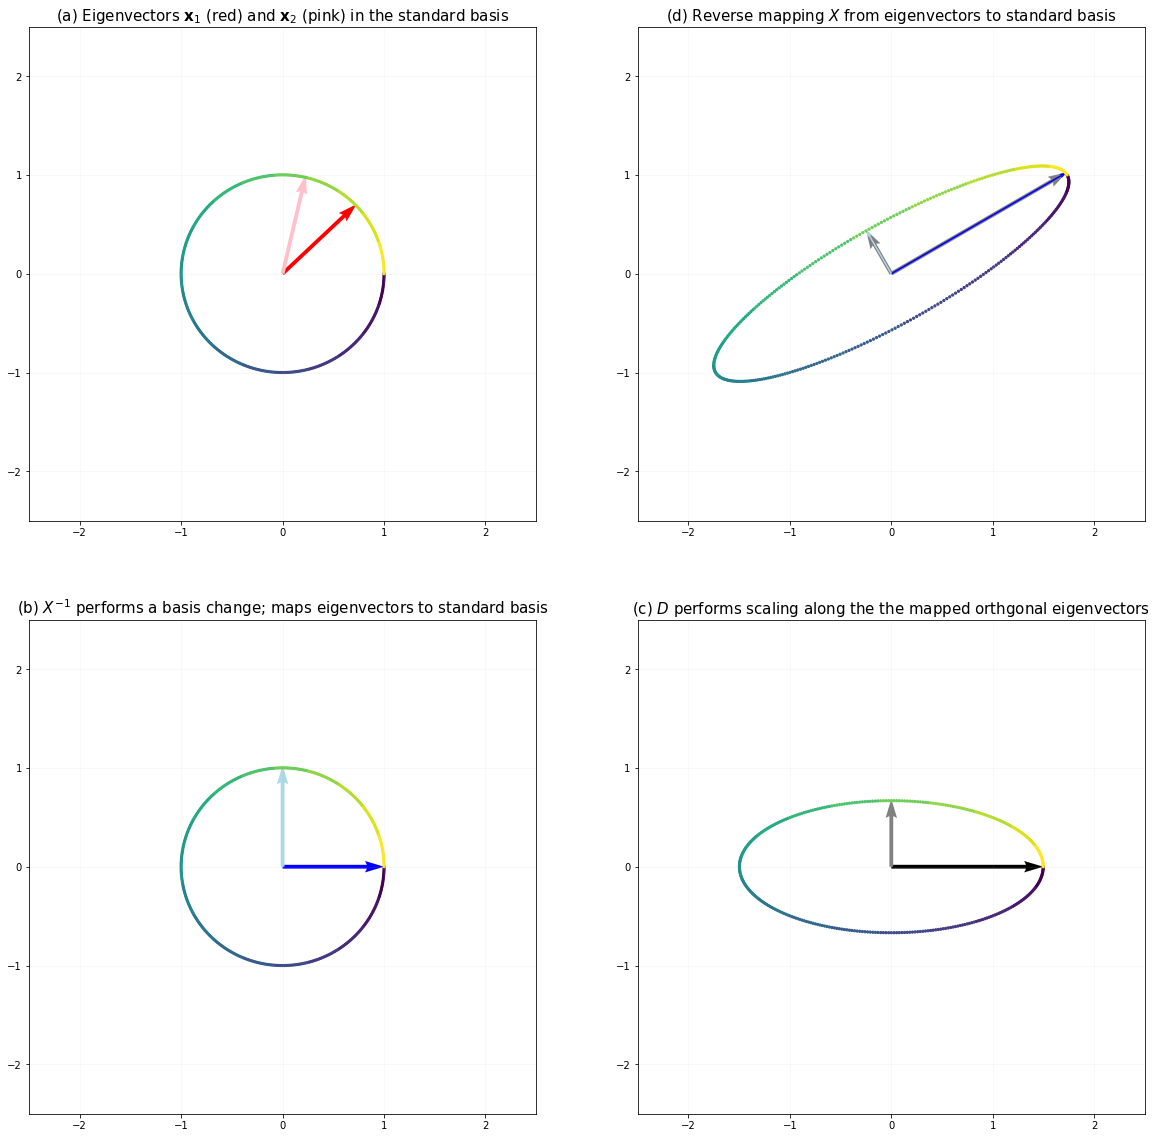

In [23]:
# Figure setup.
fig, a = plt.subplots(2, 2, figsize=(20, 20))
scale = 5
a[0][0].grid(alpha=.1); a[0][1].grid(alpha=.1); a[1][0].grid(alpha=.1); a[1][1].grid(alpha=.1) # Enable grid.
plt.setp(a, xlim=(-scale/2, scale/2), ylim=(-scale/2, scale/2))
colors = np.vstack([[i, 0, j] for i in np.linspace(0, 1, 19) for j in np.linspace(1, 0, 19)])
# Figure setup.

# First, plot the eigenvectors in the standard basis.
a[0][0].set_title(r"(a) Eigenvectors $\mathbf{x}_1$ (red) and $\mathbf{x}_2$ (pink) in the standard basis", size = 15)
# plot the first eigenvector in a red color.
a[0][0].quiver(*origin2D, *X[:, 0], scale=scale, color="red")

# plot the first eigenvector in a pink color.
a[0][0].quiver(*origin2D,  # Problem #2, fill in here.

circle = np.vstack([basis[:, 0] @ fn(theta(i)) for i in list(range(0, 361, 1))]) 
a[0][0].scatter(circle[:, 0], circle[:, 1], s=scale, c=colors[:, 0])

# Second, plot the resulting vectors after applying the X^-1 transformation.
a[1][0].set_title(r"(b) $X^{-1}$ performs a basis change; maps eigenvectors to standard basis", size = 15)

# plot the firstly mapped vector in a blue color.
a[1][0].quiver(*origin2D,  # Problem #2, fill in here.
# plot the secondly mapped vector in a lightblue color.
a[1][0].quiver(*origin2D,  # Problem #2, fill in here.

circle = np.vstack([basis[:, 0] @ fn(theta(i)) for i in list(range(0, 361, 1))])
a[1][0].scatter(circle[:, 0],circle[:, 1], s=scale,c=colors[:, 0])


# Thirdly, plot the resulting vectors after applying the X^-1 @ D transformation.
a[1][1].set_title(r"(c) $D$ performs scaling along the the mapped orthgonal eigenvectors", size = 15)

# plot the firstly mapped vector in a black color.
a[1][1].quiver(*origin2D, *X @ Xinv @ D[:, 0], scale=scale, color="black")

# plot the secondly mapped vector in a grey color.
a[1][1].quiver(*origin2D, *X @ Xinv @ D[:, 1], scale=scale, color="grey")
circle = np.vstack([basis[:, 0] @ fn(theta(i)) for i in list(range(0, 361, 1))]) @ D
a[1][1].scatter(circle[:, 0], circle[:, 1], s=scale, c=colors[:, 0])


# Finally, the transformation A is identitcal to  X @ D @ Xinv
a[0][1].set_title(r"(d) Reverse mapping $X$ from eigenvectors to standard basis", size = 15)
a[0][1].quiver(*origin2D,  # Problem #2, fill in here.
a[0][1].quiver(*origin2D,  # Problem #2, fill in here.
a[0][1].quiver(*origin2D, *X @ D @ Xinv[:, 0], scale=scale, color="b", width=.003)
a[0][1].quiver(*origin2D, *X @ D @ Xinv[:, 1], scale=scale, color="lightblue", width=.003)
circle = np.vstack([basis[:, 0] @ fn(theta(i)) for i in list(range(0, 361, 1))]) @ tempScale @ fn(theta(-ang)) # @D@P 
a[0][1].scatter(circle[:, 0],circle[:, 1], s=scale,c=colors[:,0])



